In [40]:
#Importing Necessary Libraries and Modules
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading the Dataset
df = pd.read_csv('customer_data_internship.csv', encoding="ISO-8859-1")

In [7]:
#Exploreing and Cleaning the Dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
#missing values before
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
#INFERENCES:-
#Missing descriptions (1454 entries) suggest incomplete product information; consider imputation or dropping rows if insignificant.
#With 135080 missing CustomerIDs, it's critical for customer-centric analyses; explore imputation techniques carefully.
#Ensure missing values handling maintains data integrity and doesn't introduce bias, impacting subsequent analyses.

In [10]:
df.dropna(inplace=True)

In [11]:
#missing values after
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [12]:
df.to_csv('customer_data_processed.csv', index=False)

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [15]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [16]:
# Drop rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

In [17]:
# Remove rows with negative Quantity and Price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [18]:
df['CustomerID'] = df['CustomerID'].astype(int)

# Verify the data type conversion
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int32
Country         object
dtype: object


In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
snapshot_df = max(df['InvoiceDate']) + pd.DateOffset(days=1)

In [20]:
df['Total'] = df['Quantity'] * df['UnitPrice']

In [21]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_df - x.max()).days,
    'InvoiceNo': 'nunique',
    'Total': 'sum'
})

In [22]:
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Total': 'MonetaryValue'}, inplace=True)
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


In [23]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.536422,4.272015,2054.266460
std,100.014169,7.697998,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,307.415000
50%,51.000000,2.000000,674.485000
75%,142.000000,5.000000,1661.740000
max,374.000000,209.000000,280206.020000


In [24]:
recency_bins = np.arange(rfm['Recency'].min()-1, rfm['Recency'].max()+1, step=30)
frequency_bins = np.arange(rfm['Frequency'].min()-1, rfm['Frequency'].max()+1, step=2)
monetary_bins = np.arange(rfm['MonetaryValue'].min()-3, rfm['MonetaryValue'].max()+1, step=300)

In [25]:
# Custom bin definitions
recency_bins = [rfm['Recency'].min()-1, 20, 50, 150, 250, rfm['Recency'].max()]
frequency_bins = [rfm['Frequency'].min() - 1, 2, 3, 10, 100, rfm['Frequency'].max()]
monetary_bins = [rfm['MonetaryValue'].min() - 3, 300, 600, 2000, 5000, rfm['MonetaryValue'].max()]

# Calculate Recency score based on custom bins 
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=recency_bins, labels=range(5, 0, -1), include_lowest=True)

# Calculate Frequency and Monetary scores based on custom bins
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=frequency_bins, labels=range(1, 6), include_lowest=True).astype(int)
rfm['M_Score'] = pd.cut(rfm['MonetaryValue'], bins=monetary_bins, labels=range(1, 6), include_lowest=True).astype(int)

In [26]:
# Print the first few rows of the RFM DataFrame to verify the scores
print(rfm[['R_Score', 'F_Score', 'M_Score']].head(10))

           R_Score  F_Score  M_Score
CustomerID                          
12346            1        1        5
12347            5        3        4
12348            3        3        3
12349            5        1        3
12350            1        1        2
12352            4        3        4
12353            2        1        1
12354            2        1        3
12355            2        1        2
12356            4        2        4


In [27]:
#INFERENCES:-
#Customer 12346 exhibits high recency (R_Score: 1), low frequency (F_Score: 1), and high monetary value (M_Score: 5).
#Customer 12349 demonstrates high recency (R_Score: 5), low frequency (F_Score: 1), and moderate monetary value (M_Score: 3).

In [28]:
# Extract RFM scores for K-means clustering
X = rfm[['R_Score', 'F_Score', 'M_Score']]

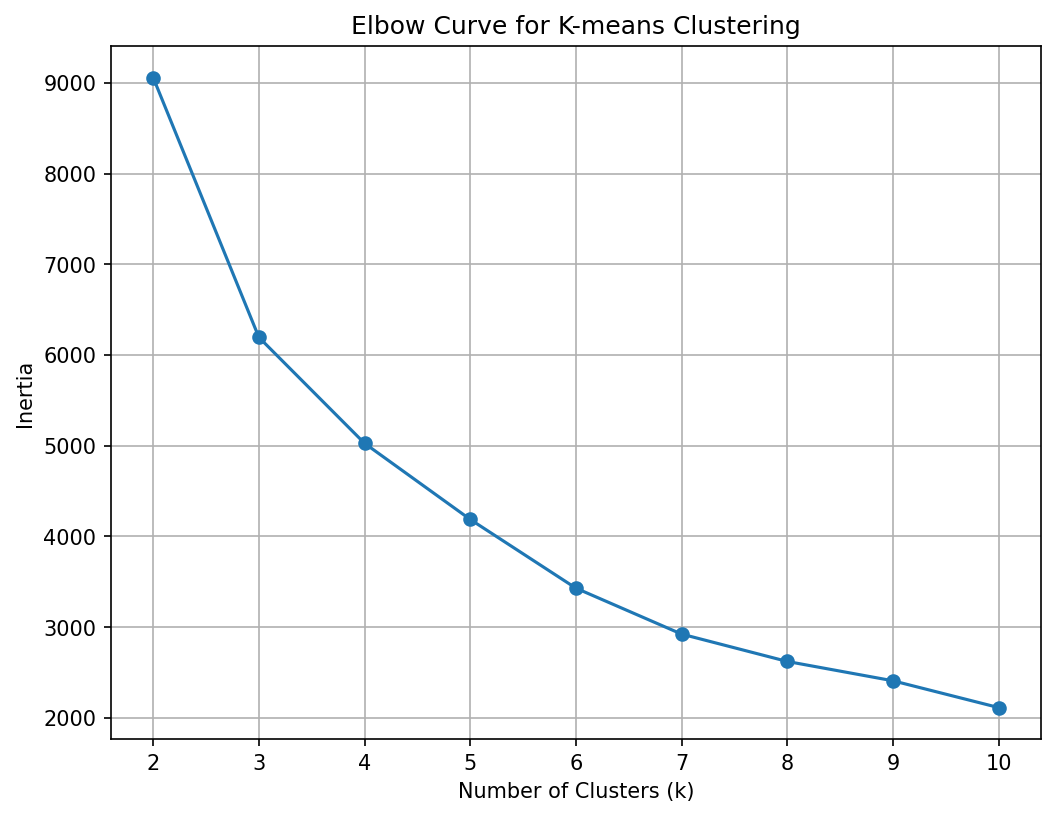

In [29]:
# Calculate inertia for different values of k
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6),dpi=150)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()

In [30]:
# Perform K-means clustering with best K
best_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
rfm['Cluster'] = best_kmeans.fit_predict(X)

In [31]:
# Convert categorical columns to numeric type
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

# Group by cluster and calculate mean values
cluster_summary = rfm.groupby('Cluster').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean'
}).reset_index()

In [32]:
print(cluster_summary)

   Cluster   R_Score   F_Score   M_Score
0        0  2.912809  1.980624  3.117330
1        1  1.797309  1.056502  1.385650
2        2  4.664587  3.179407  3.765991
3        3  4.108696  1.083004  1.878458


In [33]:
#INFERENCES:-
#Cluster 0 demonstrates moderate recency (R_Score: 2.91), low frequency (F_Score: 1.98), and moderate monetary value (M_Score: 3.12).
#Cluster 2 represents customers with high recency (R_Score: 4.66), moderate frequency (F_Score: 3.18), and moderate monetary value (M_Score: 3.77).

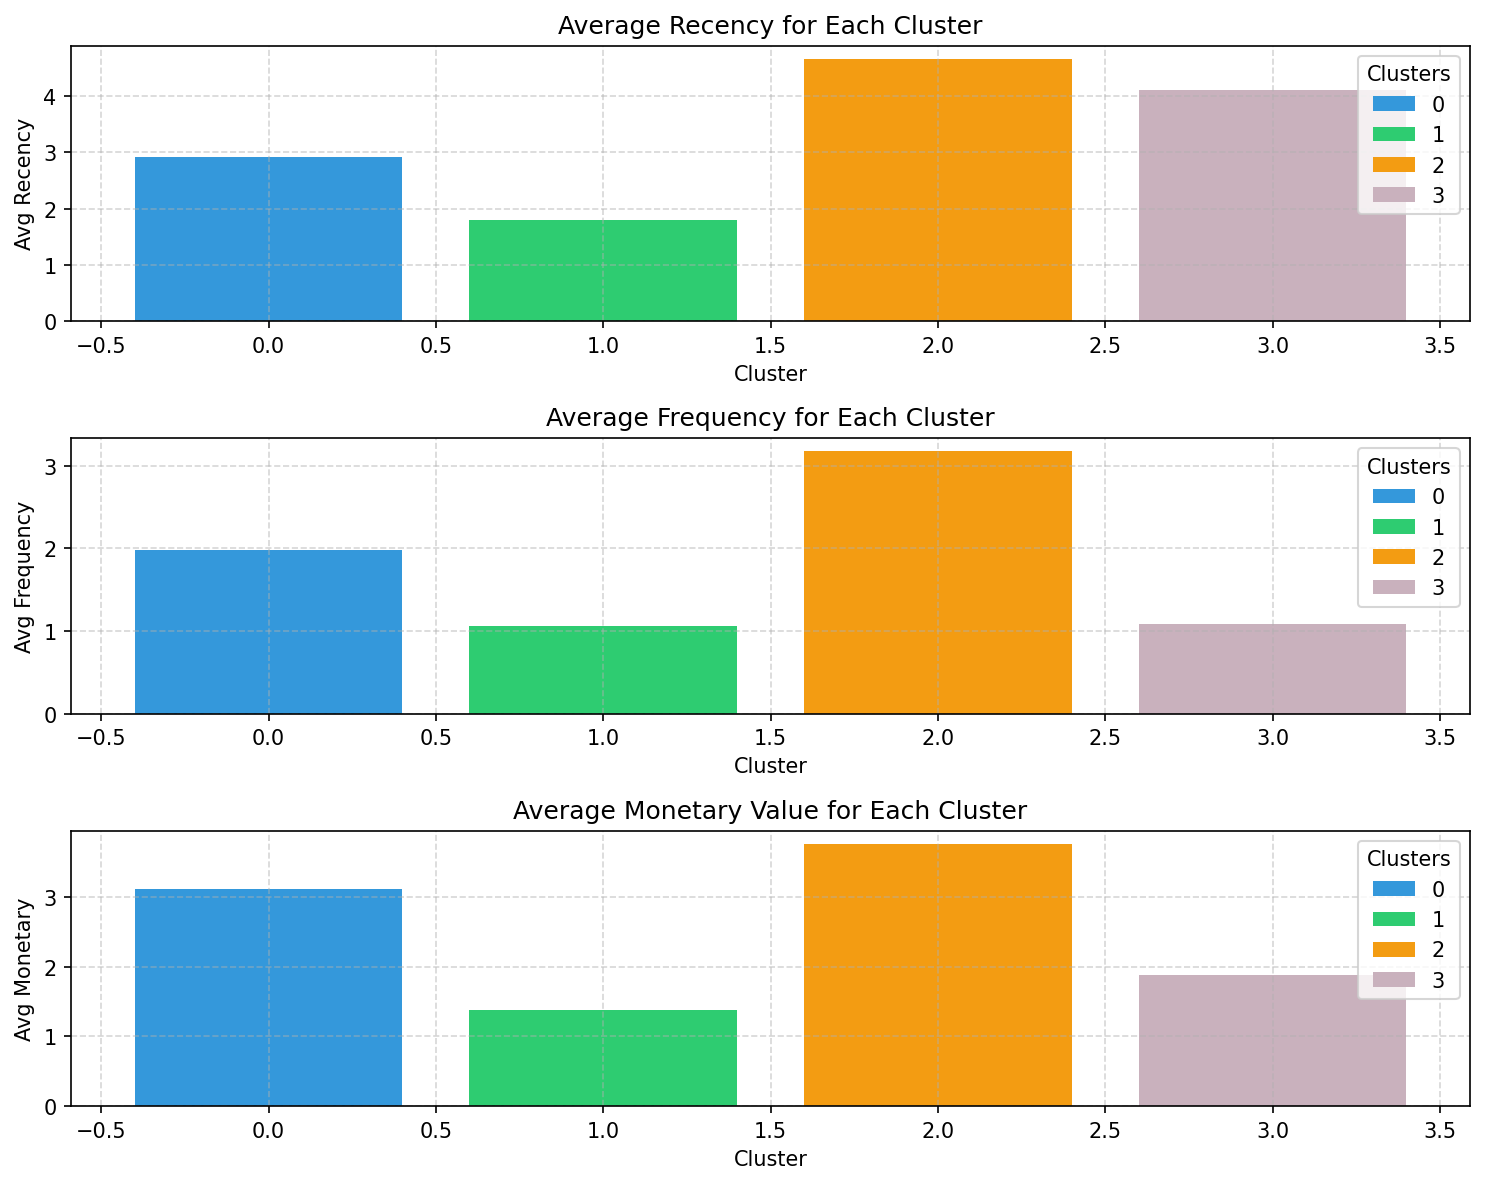

In [34]:
colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']

# Plot the average RFM scores for each cluster
plt.figure(figsize=(10, 8),dpi=150)

# Plot Average Recency
plt.subplot(3, 1, 1)
bars = plt.bar(cluster_summary.index, cluster_summary['R_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Average Frequency
plt.subplot(3, 1, 2)
bars = plt.bar(cluster_summary.index, cluster_summary['F_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Average Monetary
plt.subplot(3, 1, 3)
bars = plt.bar(cluster_summary.index, cluster_summary['M_Score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

plt.tight_layout()
plt.show()

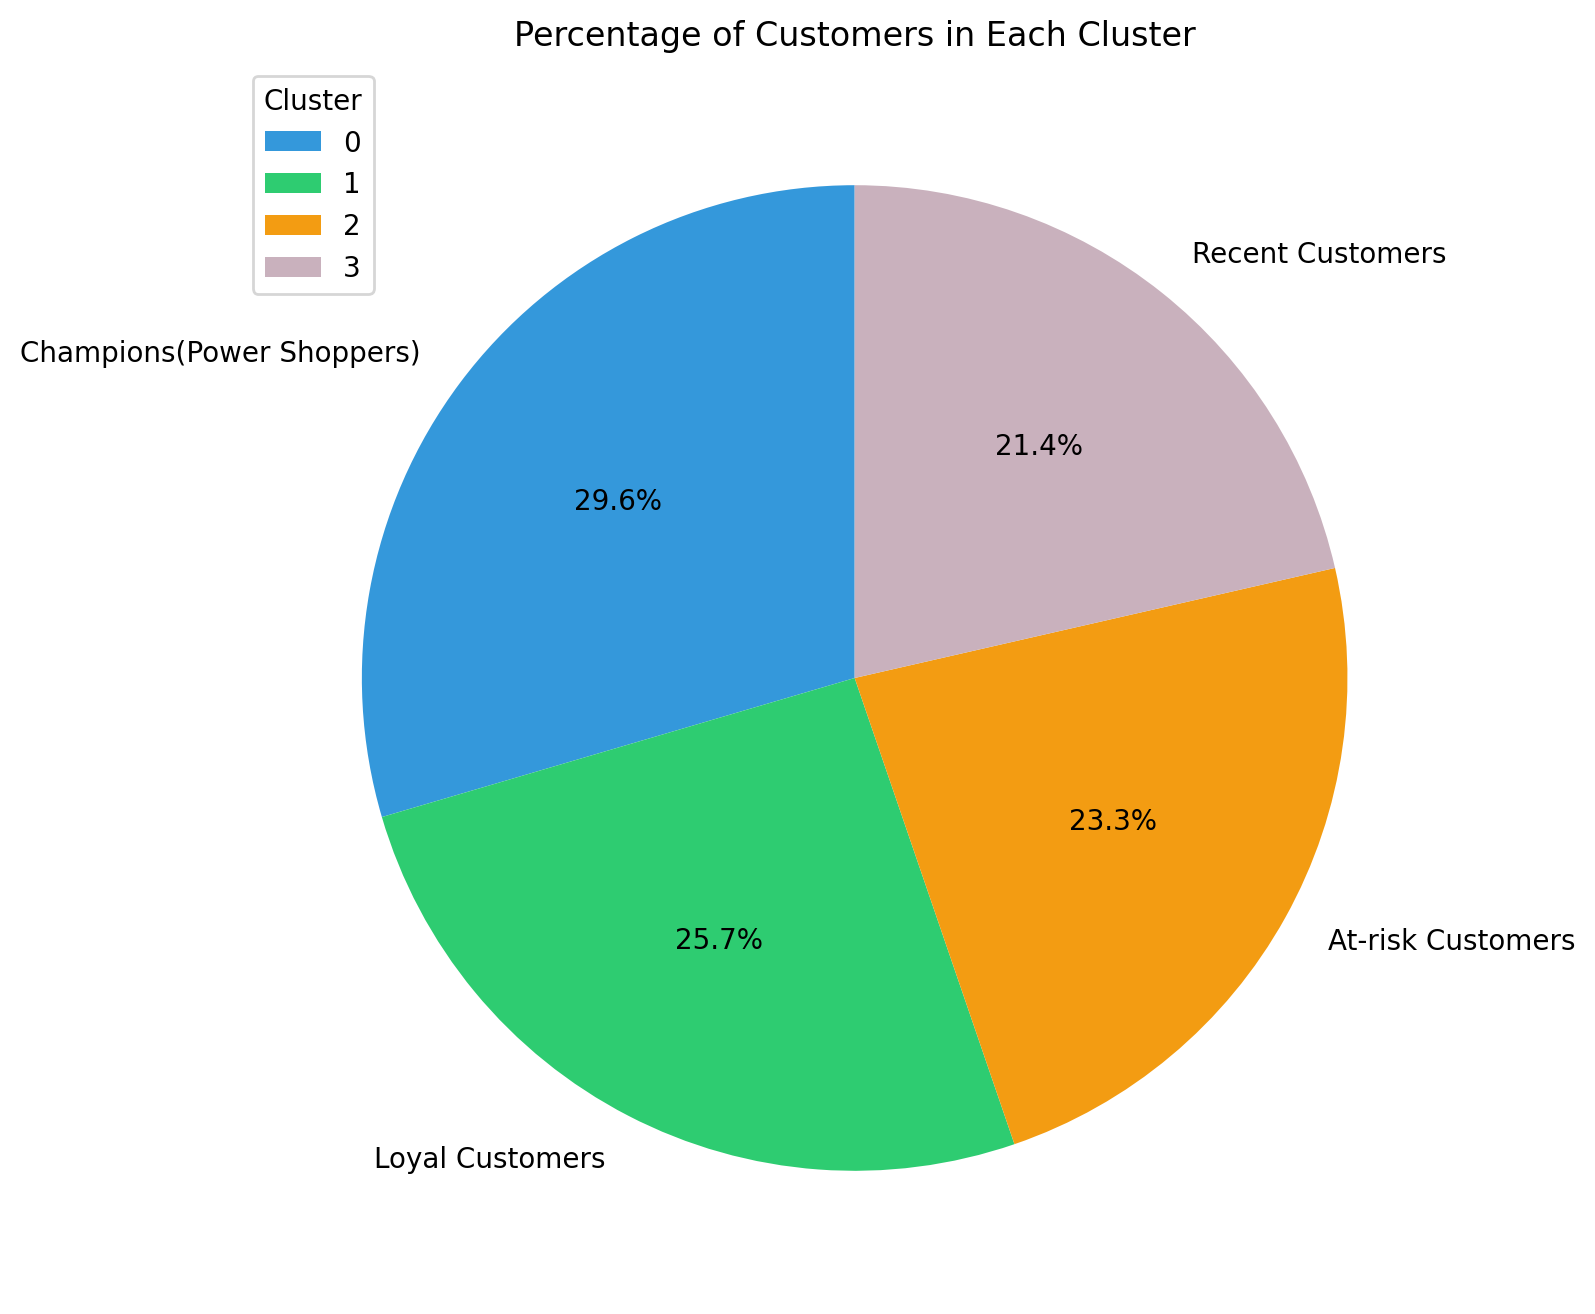

In [35]:
cluster_counts = rfm['Cluster'].value_counts()

colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']
# Calculate the total number of customers
total_customers = cluster_counts.sum()

# Calculate the percentage of customers in each cluster
percentage_customers = (cluster_counts / total_customers) * 100

labels = ['Champions(Power Shoppers)','Loyal Customers','At-risk Customers','Recent Customers']

# Create a pie chart
plt.figure(figsize=(8, 8),dpi=200)
plt.pie(percentage_customers, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Customers in Each Cluster')
plt.legend(cluster_summary['Cluster'], title='Cluster', loc='upper left')

plt.show()

In [36]:
#INFERENCES:-

#In this cluster the data is segmented with 21.4% recent customer
#23.3% for risky customers
#25.7% for loyal customer which has frequent transactions
#29.6% for power shoppers